# ANN for multiclass classification

## 01. Load Data

In [100]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn


### 01.01. torchvision

Library with computer vision functions, it includes MNIST dataset

####     transform = transforms.ToTensor()

It does some preprocessing 


In [101]:
import torchvision
import torchvision.transforms as transforms

In [102]:
train_dataset = torchvision.datasets.MNIST(
    root = '.', # we'll save it here
    train = True, # train data
    transform = transforms.ToTensor(),
    download = True
)

In [103]:
test_dataset = torchvision.datasets.MNIST(
    root = '.',
    train = False,
    transform = transforms.ToTensor(),
    download = True
)

In [104]:
!ls

MNIST  sample_data


In [105]:
x_train = train_dataset.data 
y_train = train_dataset.targets

In [106]:
x_test = test_dataset.data
y_test = test_dataset.targets

## 02. Data Analysis 

### 02.01. Training data

In [107]:
type(x_train)

torch.Tensor

In [108]:
N = x_train.shape[0]
x_train.shape

torch.Size([60000, 28, 28])

In [109]:
y_train.shape

torch.Size([60000])

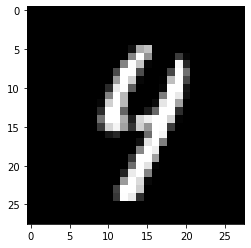

In [110]:
n = np.random.randint(N)
plt.imshow(x_train[n],cmap = 'gray')
plt.show()

### 02.02. Testing data

In [111]:
x_test.shape,y_test.shape

(torch.Size([10000, 28, 28]), torch.Size([10000]))

## 03. Data Preprocessing

### 03.01. Flattening Data

In [112]:
x_train = x_train.reshape(-1,784)
x_train.shape

torch.Size([60000, 784])

In [113]:
y_train = y_train.reshape(-1,1)
y_train.shape

torch.Size([60000, 1])

In [114]:
x_test = x_test.reshape(-1,28*28)
x_test.shape

torch.Size([10000, 784])

In [115]:
y_test = y_test.reshape(-1,1)
y_test.shape

torch.Size([10000, 1])

## 04. Model

In [116]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,10)
)
# not use of softmax

### 04.01. USE of GPU

For speeding Deep Learning computations. We need to transfer all the parameters of the model to the GPU

In [117]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

### 04.02. Loss Function

In [118]:
criterion = nn.CrossEntropyLoss()

### 04.03. Optimizer

In [119]:
optimizer = torch.optim.Adam(model.parameters())

## 05. Train Model

### 05.01. Batch Gradient Descent

It works if you have a big dataset which does not fit in memory.

* We split our dataset into batches
* For each training epoch we make one training step for each one of the batches

In [120]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size = batch_size,shuffle = True)
#for testing is not necessaru to shuffle the data
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size = batch_size,shuffle = False)

At this moment the normalization (transforms) is done

In [121]:
train_dataset.transform(train_dataset.data.numpy()).max()
#this function is internally called by the DataLoader

tensor(1.)

In [122]:
n_epochs = 10
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss = []
  for inputs,targets in train_loader:
    #move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)

    #again flat the data (because we passed all the data set to the DataLoader)
    inputs = inputs.reshape(-1,784)

    #zero gradients
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs,targets)

    #backward and optimize
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())
  
  # train loss per epoch
  train_loss = np.mean(train_loss)
  
  # test loss
  test_loss = []
  for inputs,targets in test_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    #again flat the data (because we passed all the data set to the DataLoader)
    inputs = inputs.reshape(-1,784)
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    test_loss.append(loss.item())

  test_loss = np.mean(test_loss)
  train_losses[it] = train_loss
  test_losses[it] = test_loss 

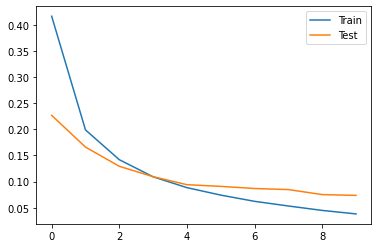

In [123]:
plt.plot(train_losses,label = "Train")
plt.plot(test_losses,label = "Test")
plt.legend()
plt.show()

## 06. Evaluate Model

### 06.01. Training Set




In [124]:

n_correct = 0
n_total = 0
for inputs,targets in train_loader:
  #move data to GPU
  inputs,targets = inputs.to(device),targets.to(device)

  #reshape input
  inputs = inputs.reshape(-1,784)

  #forward pass
  outputs = model(inputs)

  # we don't need soft max because it keeps
  # the order of the values 
  _,predictions = torch.max(outputs,1) #(max , argmax)
  n_correct +=  (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total
train_acc


0.9919166666666667

### 06.02. Testing Set

In [125]:

n_correct = 0
n_total = 0
for inputs,targets in test_loader:
#move data to GPU
  inputs,targets = inputs.to(device),targets.to(device)

  #reshape input
  inputs = inputs.reshape(-1,784)

  #forward pass
  outputs = model(inputs)

  # we don't need soft max because it keeps
  # the order of the values 
  _,predictions = torch.max(outputs,1) #(max , argmax)
  n_correct +=  (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
test_acc

0.9796